In [2]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [4]:
data_name = 'dibox'

In [5]:
query = f'''select label_id, count(img_dir) as count from DeepInSight.{data_name}_landmark_info group by label_id;'''

In [6]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [7]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')
df['label_id'] = df['label_id'].astype('str')

In [8]:
mean_count = df['count'].mean()

In [9]:
mean_count

34.03703703703704

In [10]:
df = df.sort_values(by='count', ascending=False)
df

,label_id,count
7,154,333
10,158,137
1,028,132
6,127,61
2,029,48
0,016,25
20,183,25
16,177,24
25,192,20
18,179,14


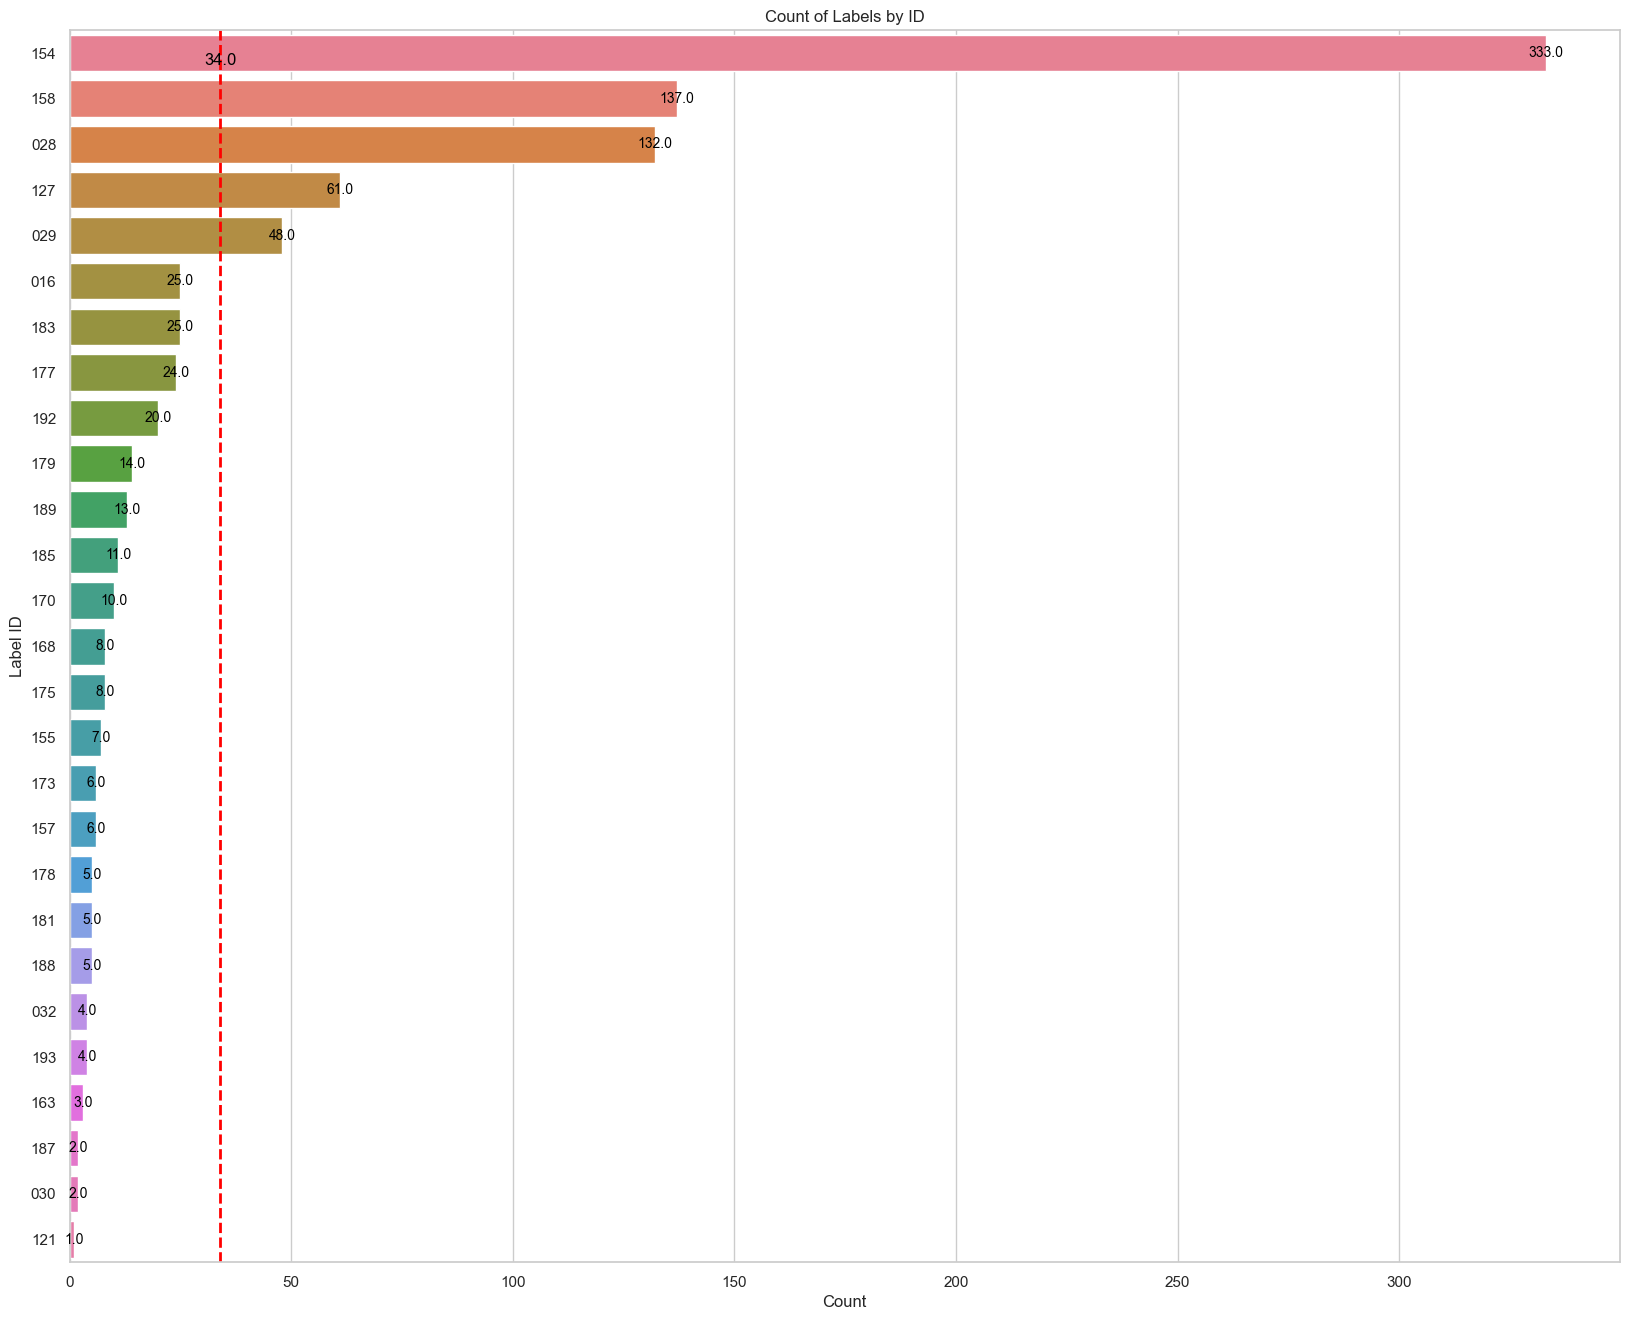

In [11]:
try:
    plt.figure(figsize=(20, 16))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='count', y='label_id', data=df, hue='label_id')
    for p in ax.patches:
        count = p.get_width()  # 막대의 너비를 가져와서 count로 사용
        label = p.get_y() + p.get_height() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{count}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.axvline(mean_count, color='red', linestyle='--', linewidth=2, label='평균값')
    plt.text(mean_count, 0, f'{mean_count:.1f}', color='black', ha='center', va='top')
    plt.xlabel('Count')
    plt.ylabel('Label ID')
    plt.title('Count of Labels by ID')
    save_path = f'label/{data_name}_landmark_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)

In [10]:
doUT.connect_end()

SQL connection closed
